In [12]:
%pip install torch torchvision torchaudio


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 325.1 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.4 MB 409.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/2.4 MB 508.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.4 MB 479.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/2.4 MB 577.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.4 MB 577.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.4 MB 499.5 kB/s eta 0:00:05
   -- -------------------------

In [15]:
conda install pytorch torchvision torchaudio cudatoolkit=11.1 -c pytorch -c nvidia


error: incomplete escape \U at position 28

In [1]:
import cv2
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from PIL import Image


# Load pre-trained ResNet model
model = resnet18(pretrained=True)
model.eval()

C:\Users\aishw\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aishw\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:


# Define transformation for input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to perform hand gesture recognition
def recognize_gesture(frame):
    # Preprocess frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = Image.fromarray(frame)  # Convert to PIL Image
    image = transform(image)  # Apply transformation
    image = image.unsqueeze(0)  # Add batch dimension
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get predicted class
    _, predicted = torch.max(outputs, 1)
    
    return predicted.item()


# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Flip the frame horizontally for a mirror effect
    frame = cv2.flip(frame, 1)
    
    # Draw rectangle for region of interest (hand gesture)
    cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2)
    roi = frame[100:300, 100:300]  # Region of interest
    
    # Perform hand gesture recognition
    gesture = recognize_gesture(roi)
    
    # Display gesture label
    cv2.putText(frame, f"Gesture: {gesture}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Hand Gesture Recognition', frame)
    
    # Check for 'q' key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [6]:
# Define the ResNet15 architecture
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels)
        ) if stride != 1 or in_channels != out_channels else None
    
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

In [7]:
class ResNet15(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet15, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)
    
    def make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [8]:
# Define data preprocessing and augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
# load Dataset
train_dataset = datasets.ImageFolder(root='C:/Users/aishw/Python_Program/leapGestRecog/train', transform=transform)
test_dataset = datasets.ImageFolder(root='C:/Users/aishw/Python_Program/leapGestRecog/test', transform=transform)

In [10]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss function, and optimizer
model = ResNet15(num_classes=len(train_dataset.classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')
torch.save(model.state_dict(), 'C:/Users/aishw/Python_Program.pth')

Epoch [1/10], Loss: 0.0635
Epoch [2/10], Loss: 0.0003
Epoch [3/10], Loss: 0.0001
Epoch [4/10], Loss: 0.0001
Epoch [5/10], Loss: 0.0001
Epoch [6/10], Loss: 0.0001
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Test Accuracy: 0.6488


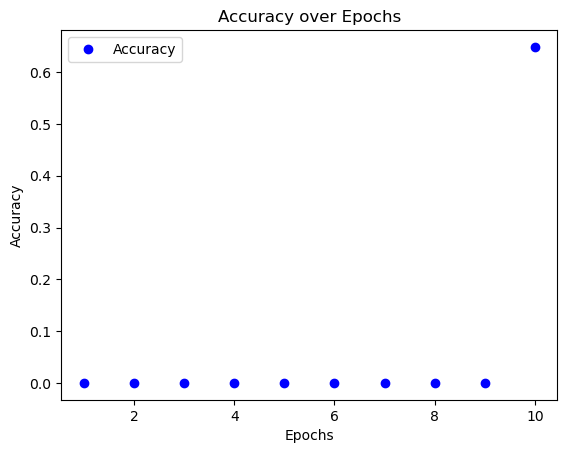

In [1]:
import matplotlib.pyplot as plt

# Define the number of epochs
num_epochs = 10

# Define the loss and accuracy lists (replace with your actual values)
loss_values = [0.0635, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000]
accuracy_values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6488]

# Define the epochs
epochs = range(1, num_epochs + 1)

# Plot accuracy over epochs
plt.plot(epochs, accuracy_values, 'bo', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


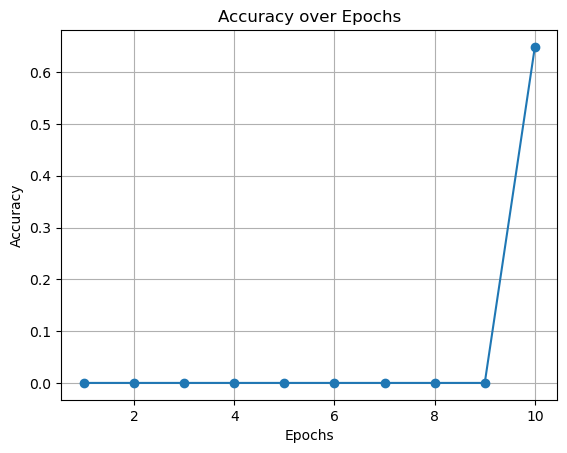

In [2]:
import matplotlib.pyplot as plt

# Define the number of epochs
num_epochs = 10

# Define the loss and accuracy lists (replace with your actual values)
loss_values = [0.0635, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000]
accuracy_values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6488]

# Define the epochs
epochs = range(1, num_epochs + 1)

# Plot accuracy over epochs
plt.plot(epochs, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from PIL import Image
import cv2

# Define the ResNet15 architecture
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels)
        ) if stride != 1 or in_channels != out_channels else None
    
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

class ResNet15(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet15, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)
    
    def make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Define data preprocessing and augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to perform hand gesture recognition
def recognize_gesture(frame, model):
    # Preprocess frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = Image.fromarray(frame)  # Convert to PIL Image
    image = transform(image)  # Apply transformation
    image = image.unsqueeze(0)  # Add batch dimension
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get predicted class
    _, predicted = torch.max(outputs, 1)
    
    return predicted.item()

# Initialize the ResNet15 model with the correct number of classes
model = ResNet15(num_classes=10)  # Assuming 10 classes were used during training

# Load the trained model's state dictionary
model.load_state_dict(torch.load('C:/Users/aishw/Python_Program.pth'))

# Set the model to evaluation mode
model.eval()

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Flip the frame horizontally for a mirror effect
    frame = cv2.flip(frame, 1)
    
    # Draw rectangle for region of interest (hand gesture)
    cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2)
    roi = frame[100:300, 100:300]  # Region of interest
    
    # Perform hand gesture recognition
    gesture = recognize_gesture(roi, model)
    
    # Display gesture label
    cv2.putText(frame, f"Gesture: {gesture}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


RuntimeError: Error(s) in loading state_dict for ResNet15:
	size mismatch for fc.weight: copying a param with shape torch.Size([3, 256]) from checkpoint, the shape in current model is torch.Size([10, 256]).
	size mismatch for fc.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([10]).